In [1]:
from fastai.tabular import *

In [2]:
path = Path("/home/jupyter/projects/bimbo")

In [3]:
# df = pd.read_feather('tmp/df_merge_small')
df = pd.read_parquet('tmp/train_feat.parquet')
df_test = pd.read_parquet('tmp/test_feat.parquet')

df['Demanda_uni_equil'] = df['Demanda_uni_equil'] + 1

In [4]:
df['is_valid'] = df['Semana'] >= 8

In [17]:
dep_var = 'Demanda_uni_equil'
cat_names = ['Canal_ID', 'Ruta_SAK', 'geo', 'NombreProducto', 'NombreCliente']
cont_names = ['Semana', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima']
df = df[cat_names + cont_names + [dep_var, 'is_valid']]

procs = [FillMissing, Categorify, Normalize]

NameError: name 'Normlize' is not defined

In [6]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_from_df(col='is_valid')
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                           .add_test(TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))
                           .databunch(bs=100000))

In [7]:
learn = tabular_learner(data, layers=[200,100], metrics=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


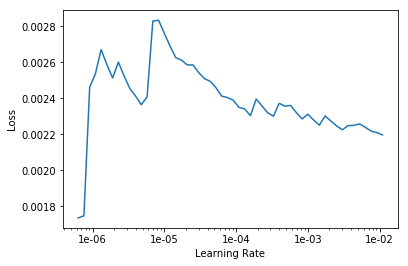

In [27]:
# learn.lr_find()
# learn.recorder.plot()

In [9]:
# learn.load('naive-neural-200-100')
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.003834,0.047063,0.078820,15:23


In [10]:
learn.save('naive-neural-200-100')

In [12]:
learn.export('nn-200-100')